Input Data and Shape
(3000, 2)


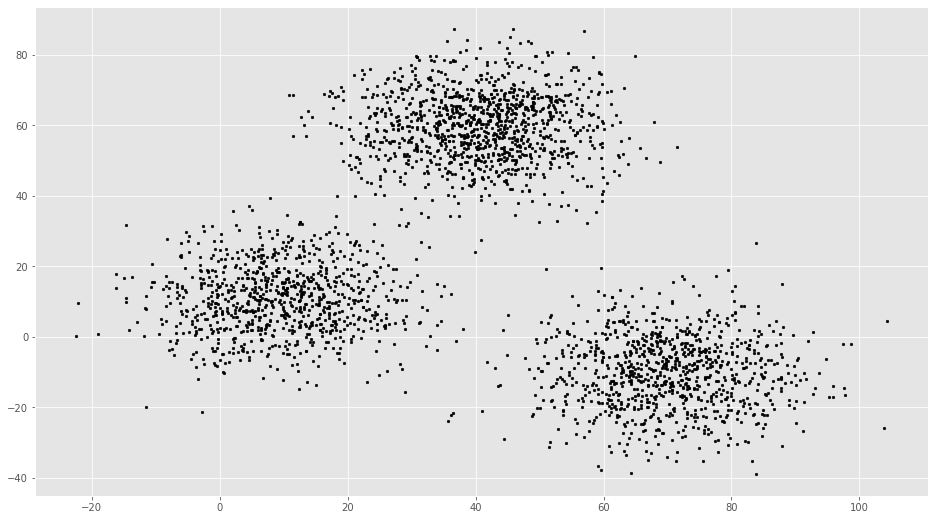

In [78]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Importing the dataset
data = pd.read_csv("./xclara.csv")
print("Input Data and Shape")
print(data.shape)
data.head()

# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [80]:
# print(X)
def distance(X, centroid):
    return np.sqrt(np.sum( (X-centroid)**2 , axis = 1))

# centroids = np.array([ [0,0],[70,-20],[40,60] ])
# distance(X,centroids[0])
classes = 3
b = 2
EPS = 1e-7
sampleNumber = X.shape[0]

U = np.random.rand(sampleNumber,classes)
sumU = 1/np.sum(U,axis=1)
U = np.multiply(U.T,sumU).T
print(U)




[[0.07060691 0.10085244 0.82854066]
 [0.15767563 0.34112421 0.50120017]
 [0.61610267 0.31548406 0.06841328]
 ...
 [0.6861742  0.27101355 0.04281225]
 [0.4233196  0.52530696 0.05137344]
 [0.17388297 0.81959129 0.00652574]]


In [81]:
for i in range(classes):
    print(sum(U[:,i]**b))

422.0012487910888
433.0459668744491
431.08139641956416


[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 ...
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[34.55670851 16.37443969]
 [54.33532     1.64946399]
 [        nan         nan]]


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

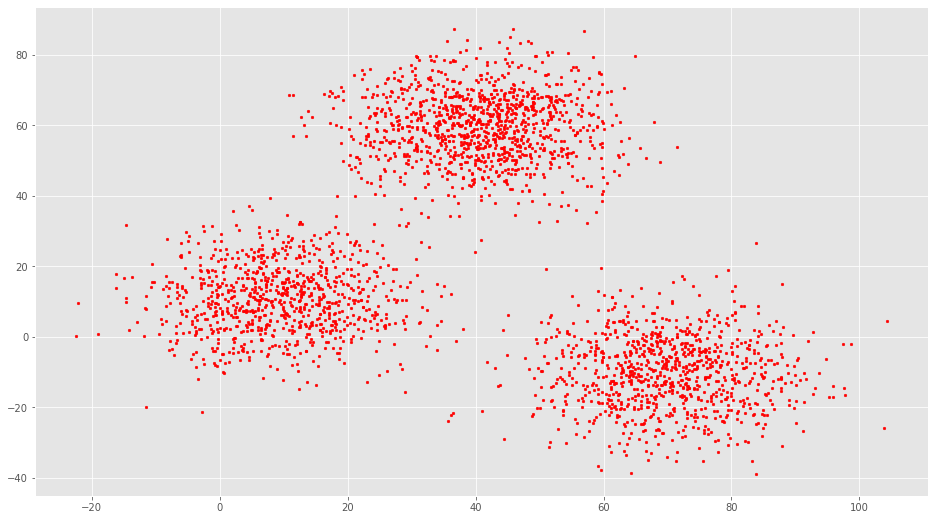

In [99]:
U_old = np.zeros( (sampleNumber,classes) )
while np.max(np.abs(U-U_old))>EPS: # 终止条件
    centroids = []
    for i in range(classes): #第i个聚类中心
        centroid = np.dot(U[:,i]**b , X ) / np.sum(U[:,i]**b)
        centroids.append(centroid)
    U_old = U.copy()
    U = np.zeros( (sampleNumber,classes) )
    for i in range(classes):
        suma = np.zeros(sampleNumber)
        for k in range(classes):
            suma +=  distance(X, centroids[k]) ** (2/(b-1))
        U[:,i] = distance(X, centroids[i] ) ** (2/(b-1)) / suma 
            # U[:,i] += (distance(X, centroids[i] )/ distance(X, centroids[k]) )** (2/(b-1)) 
    U = 1 / U
print(U)

centroids = np.array(centroids)
Uc = np.argmax(U, axis=1)
print(centroids)

c_x = centroids[:,0] # 3个横坐标
c_y = centroids[:,1] # 3个纵坐标
colors = ['r' ,'g' ,'b', 'y' ,'c', 'm' ] 
fig,ax = plt.subplots()
for i in range(classes):
    points = np.array( [X[j] for j in range(len(X)) if Uc[j]==i ])
    ax.scatter(points[:,0],points[:,1],s=7,c=colors[i])
ax.scatter(c_x,c_y,marker='*',c='black')

# for i in range(len(Uc)):
#     # plt.scatter(x[i],y[i],c=('green' if Uc[i]==0 else 'blue' if Uc[i]==1 else 'magenta'),alpha=0.5)
#     plt.scatter(X[i],X[i],c=colors[Uc[i]])
# plt.scatter(c_x,c_y,marker='*',c='black')


In [40]:
np.dot(np.array([1,2,3]),np.array([4,5,6]))

32

In [ ]:
centroids = []
for i in range(classes): #第i个聚类中心
    centroid = np.dot(U[:,i]**b , X ) / np.sum(U[:,i]**b)
    centroids.append(centroid)

U_old = U.copy()

In [98]:
suma = np.zeros(sampleNumber)
for k in range(classes):
    print(centroids[k])
    suma +=  distance(X, centroids[k]) ** (2/(b-1))
    print(distance(X, centroids[k]) ** (2/(b-1)))
print(suma)



[40.809159   22.61490917]
[2169.10463433  569.79917781 1812.08139766 ... 1656.30123681 3707.34270198
 2834.90471389]
[41.00136116 22.47683819]
[2176.91114576  576.76137448 1823.18429521 ... 1638.11892003 3678.58240304
 2812.5932816 ]
[40.03704319 23.70226549]
[2167.29520801  551.11082871 1785.77822765 ... 1766.62870424 3862.03332071
 2977.13573292]
[ 6513.31098811  1697.671381    5421.04392052 ...  5061.04886108
 11247.95842572  8624.63372842]
